### Random walk  generation 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def gbm0(n_years=10, n_scenarios=1000, 
         mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1 + rets).cumprod()
    return prices

In [70]:
p = gbm0(10, n_scenarios=3)

In [71]:
p.head()

,0,1,2
0,98.052256,97.113478,94.164538
1,107.008408,99.665608,91.416564
2,104.546838,102.571401,93.899077
3,106.342845,98.575269,93.529540
4,116.145425,104.146309,98.580297


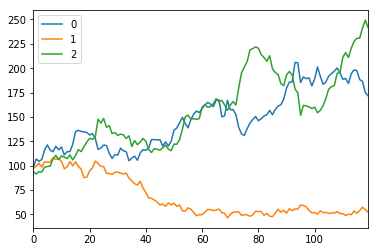

In [72]:
p.plot()
plt.show()

In [73]:
p = gbm0(n_years=10, n_scenarios=1000)
p.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,106.042384,99.211145,103.021664,106.181239,99.705255,90.597567,102.570631,101.590007,98.935574,98.447826,...,100.354813,97.837874,100.651737,98.138921,102.024842,101.420515,103.017794,106.509956,97.731167,96.761428
1,105.069173,94.228474,99.867162,106.052441,99.404139,91.785577,105.269412,102.066661,96.338827,104.511459,...,104.825362,94.716574,101.348820,95.301057,100.407484,97.352410,102.309287,106.558999,93.925187,102.416915
2,105.106453,95.179855,94.545112,107.773771,98.216619,90.139505,104.727443,107.601184,101.341570,100.015666,...,102.796680,90.532530,106.744211,94.606231,103.046316,105.656131,103.399438,98.920864,91.588888,106.136071
3,104.498506,104.000260,96.857099,96.626377,97.902291,93.267467,104.549670,108.895614,88.768207,95.455086,...,105.298881,96.330292,104.954055,99.041272,95.678780,99.252146,104.088083,95.265774,88.183554,98.852749
4,105.388484,106.536325,97.078672,98.478466,107.036951,87.956424,104.573330,111.441313,87.649154,98.815593,...,109.070429,93.866560,103.427125,96.998447,90.382637,97.540558,98.916281,94.047485,88.716548,98.087961


In [ ]:
def gbm1(n_years=10, n_scenarios=1000, 
         mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1 + rets).cumprod()
    return prices